In [ ]:
!which python3

/usr/bin/python3


In [ ]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf # TensorFlow is a popular deep learning framework
from tensorflow import keras # Keras is a high-level API for building and training deep learning models
from tensorflow.keras import layers # Layers module provides building blocks for constructing deep learning models
import numpy as np
import pandas as pd
import os
import cv2
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
# Defining the Model

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


In [ ]:
from keras import optimizers
optm = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(optimizer=tf.optimizers.Adam(learning_rate = 1e-6), # Adam optimizer adjusts the learning rate adaptively
              loss='sparse_categorical_crossentropy', # Binary cross-entropy loss function for binary classification problems
              metrics=['accuracy']) # Accuracy metric to evaluate the model's performance

In [ ]:
X_train = np.load('gdrive/MyDrive/minor_project/X_train_scaled.npy')
X_test = np.load('gdrive/MyDrive/minor_project/X_test_scaled.npy')
y_train = np.load('gdrive/MyDrive/minor_project/y_train.npy')
y_test = np.load('gdrive/MyDrive/minor_project/y_test.npy')

NameError: ignored

In [ ]:
print('X Train Shape is :',X_train.shape)
print('X Test Shape is :',X_test.shape)
print('Y Train Shape is :',y_train.shape)
print('Y Test Shape is :',y_test.shape)

X Train Shape is : (5214, 128, 128, 3)
X Test Shape is : (1304, 128, 128, 3)
Y Train Shape is : (5214,)
Y Test Shape is : (1304,)


In [ ]:
hist=model.fit(X_train,y_train,epochs=100, validation_split = 0.2,shuffle = True)

Epoch 1/100
131/131 [==============================] - 21s 36ms/step - loss: 0.6830 - accuracy: 0.5313 - val_loss: 0.6733 - val_accuracy: 0.5599
Epoch 2/100
131/131 [==============================] - 3s 26ms/step - loss: 0.6660 - accuracy: 0.6051 - val_loss: 0.6535 - val_accuracy: 0.6721
Epoch 3/100
131/131 [==============================] - 3s 24ms/step - loss: 0.6451 - accuracy: 0.7140 - val_loss: 0.6291 - val_accuracy: 0.7996
Epoch 4/100
131/131 [==============================] - 3s 26ms/step - loss: 0.6181 - accuracy: 0.7828 - val_loss: 0.5977 - val_accuracy: 0.8341
Epoch 5/100
131/131 [==============================] - 5s 39ms/step - loss: 0.5849 - accuracy: 0.8259 - val_loss: 0.5592 - val_accuracy: 0.8504
Epoch 6/100
131/131 [==============================] - 4s 32ms/step - loss: 0.5458 - accuracy: 0.8480 - val_loss: 0.5151 - val_accuracy: 0.8706
Epoch 7/100
131/131 [==============================] - 4s 30ms/step - loss: 0.5018 - accuracy: 0.8693 - val_loss: 0.4700 - val_accuracy

In [ ]:
import pickle
with open('model.pkl', 'wb') as f:
  pickle.dump(model, f)

In [ ]:
result = model.evaluate(X_test, y_test)
print(result)

41/41 [==============================] - 1s 14ms/step - loss: 0.2140 - accuracy: 0.9218
[0.21397942304611206, 0.9217791557312012]


In [ ]:
y_predd = model.predict(X_test)
y_pred_a = []
for i in y_predd:
  if i[0] > i[1]:
    y_pred_a.append(0)
  else:
    y_pred_a.append(1)

41/41 [==============================] - 1s 9ms/step


In [ ]:
clr_rep = classification_report(y_test, y_pred_a)
print(clr_rep)

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       697
           1       0.88      0.96      0.92       607

    accuracy                           0.92      1304
   macro avg       0.92      0.92      0.92      1304
weighted avg       0.93      0.92      0.92      1304



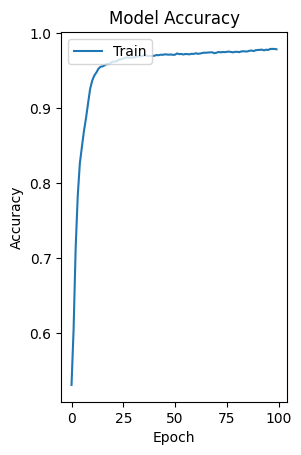

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train'], loc='upper left')

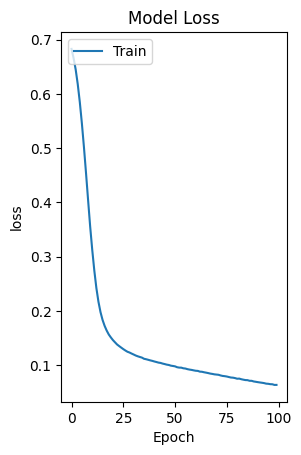

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train'], loc='upper left')

In [ ]:
X_test2 = np.load('gdrive/MyDrive/minor_project/X_test2_scaled.npy')
y_train2 = np.load('gdrive/MyDrive/minor_project/y_test2_scaled.npy')

In [ ]:

result = model.evaluate(X_test2, y_train2)
print(result)

1/1 [==============================] - 0s 299ms/step - loss: 0.2802 - accuracy: 0.9231
[0.2801709771156311, 0.9230769276618958]


In [ ]:
y_pred = model.predict(X_test2)
# clr_rep = classification_report(y_train2, y_pred)
# print(clr_rep)

1/1 [==============================] - 0s 24ms/step


In [ ]:
y_pred_ac = []
for i in y_pred:
  if i[0] > i[1]:
    y_pred_ac.append(0)
  else:
    y_pred_ac.append(1)

In [ ]:
clr_rep = classification_report(y_train2, y_pred_ac)
print(clr_rep)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.90      0.90      0.90        10

    accuracy                           0.92        26
   macro avg       0.92      0.92      0.92        26
weighted avg       0.92      0.92      0.92        26



Epoch 1/20
131/131 [==============================] - 4s 28ms/step - loss: 0.0337 - accuracy: 0.9895 - val_loss: 0.0458 - val_accuracy: 0.9827
Epoch 2/20
131/131 [==============================] - 3s 23ms/step - loss: 0.0336 - accuracy: 0.9904 - val_loss: 0.0464 - val_accuracy: 0.9827
Epoch 3/20
131/131 [==============================] - 3s 21ms/step - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0459 - val_accuracy: 0.9827
Epoch 4/20
131/131 [==============================] - 3s 22ms/step - loss: 0.0343 - accuracy: 0.9892 - val_loss: 0.0449 - val_accuracy: 0.9847
Epoch 5/20
131/131 [==============================] - 3s 22ms/step - loss: 0.0334 - accuracy: 0.9902 - val_loss: 0.0448 - val_accuracy: 0.9847
Epoch 6/20
131/131 [==============================] - 3s 24ms/step - loss: 0.0331 - accuracy: 0.9902 - val_loss: 0.0453 - val_accuracy: 0.9856
Epoch 7/20
131/131 [==============================] - 3s 22ms/step - loss: 0.0332 - accuracy: 0.9904 - val_loss: 0.0451 - val_accuracy: 0.9847

In [ ]:
result = model2.evaluate(X_test2, y_train2)
print(result)

1/1 [==============================] - 0s 32ms/step - loss: 0.6902 - accuracy: 0.6154
[0.6901867389678955, 0.6153846383094788]


In [ ]:
result = model2.evaluate(X_test, y_test)
print(result)

41/41 [==============================] - 0s 9ms/step - loss: 0.6922 - accuracy: 0.5345
[0.6922462582588196, 0.5345091819763184]
